In [1]:
%matplotlib notebook
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import colormaps as cmaps
import os
import scipy as sp
import scipy.constants as c
from scipy.ndimage.interpolation import rotate
from magpie_data import PolarimetryMap2, FaradayMap2, NeLMap2, Interferogram, OpticalFrames
import scipy.constants as c
from mcerp import N, umath, Gamma
from bdots import *
import pickle
import csv
import string
import images2gif as ig

letters=list(string.ascii_lowercase)

In [2]:
cd "~\Google Drive\MAGPIE\data\2016\s0129_16 RECONNECTION 12 fr + Bdots +Fday cup\s0129_16 12 Frame"

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0129_16 RECONNECTION 12 fr + Bdots +Fday cup\s0129_16 12 Frame


In [3]:
s=OpticalFrames(145,15)
s.logarithm()
s.s_nl[9]=s.s_nl[9]*0.8
s.rotate(-90+25.4)
s.crop((575,550), xcrop=230, ycrop=350)
pl=[None,300,270,255,247,232,190,145,111, None,None,None]

<IPython.core.display.Javascript object>


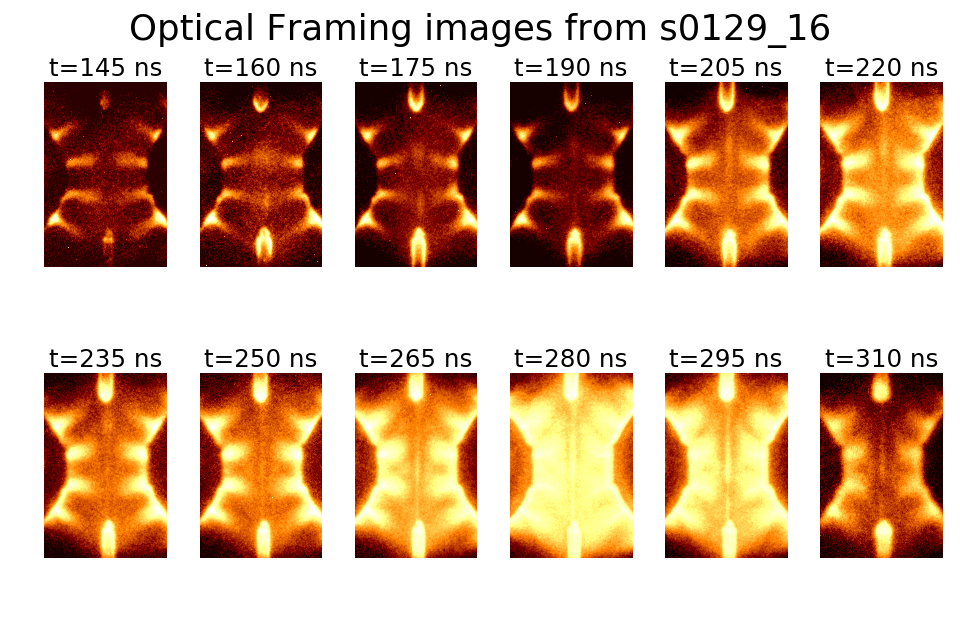

In [4]:
%matplotlib notebook
s.plot_sequence(figsize=(12,8))
pl=[None,300,270,255,247,232,190,145,111, None,None,None]

In [84]:
from skimage.measure import profile_line
i=7

#find coordinates in pixels
cut_off=150
start_px=(cut_off,s.origin[1])
end_px=(2*s.origin[0]-cut_off,s.origin[1])

lineout_width=10
#use scikit image to do a nice lineout on the cropped array
lo=profile_line(s.s_c[i], start_px,end_px,linewidth=lineout_width)
#set up a mm scale centred on 0
px_range=np.arange(cut_off,lo.shape[0]+cut_off)

<IPython.core.display.Javascript object>


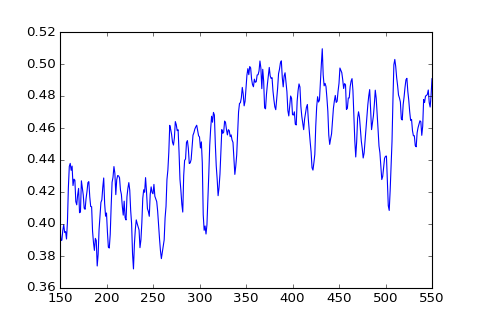

In [86]:
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(px_range, lo)

pl=[None,290,285,250,230,220,200,145,111, None,None,None]

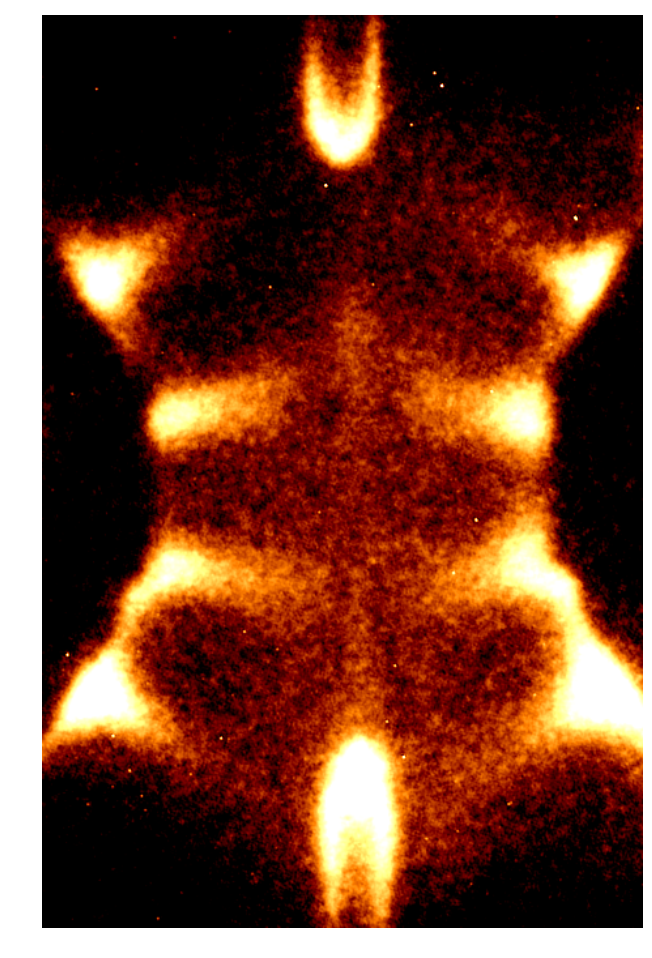

In [93]:
w=6
h=w/s.s_c[0].shape[1]*s.s_c[0].shape[0]
fig, ax=plt.subplots(figsize=(w,h))

i=3
im=s.s_c[i]
plasmoid_location=pl[i]
ax.imshow(im, cmap='afmhot', clim=[0.0,0.6])
plt.axis('off')
#ax.text(s=str(s.frame_times[i])+' ns', ha='left', va='top',x=10, y=10, fontsize=40, color='w')
'''ax.annotate('', xy=(270, plasmoid_location), xytext=(370, plasmoid_location),
            arrowprops=dict(facecolor='white', width=15, headwidth=30,headlength=30),
            )'''

fig.subplots_adjust(left=0, bottom=0, right=1.0, top=1.0,
    wspace=0, hspace=0)


In [19]:
fig.savefig('s0129_16 12 frame, f5.png')

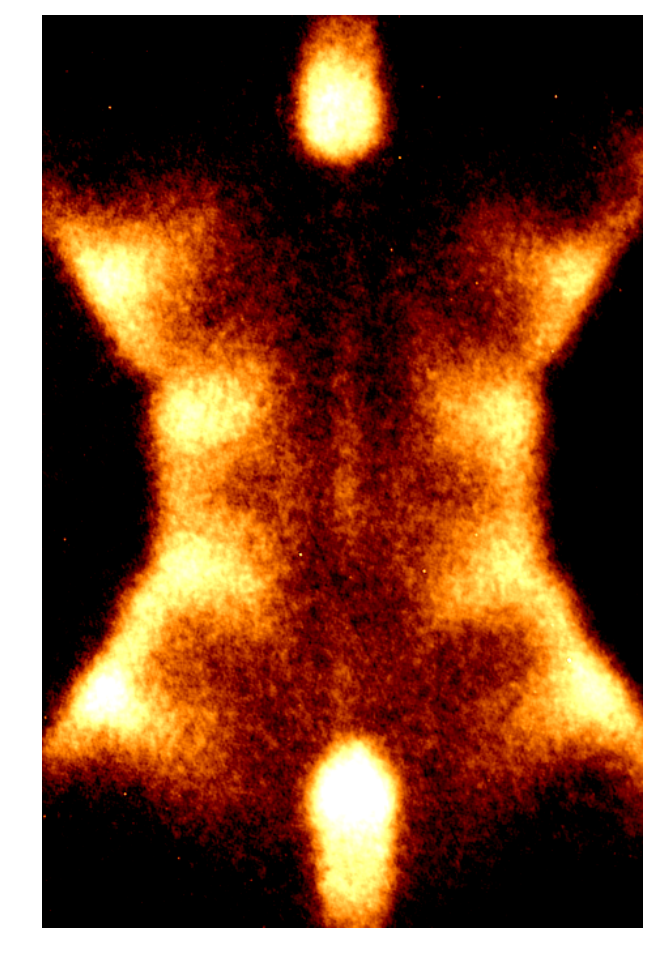

In [92]:
%matplotlib inline
w=6
h=w/s.s_c[0].shape[1]*s.s_c[0].shape[0]
fig, ax=plt.subplots(figsize=(w,h))
hot_im=[]
for i,im in enumerate(s.s_c):
    im=s.s_c[i]
    plasmoid_location=pl[i]
    clim=[0.2,0.8]
    if i is 3:
        clim=[0.0,0.6]
    ax.imshow(im, cmap='afmhot', clim=clim)
    plt.axis('off')
    t=ax.text(s=str(s.frame_times[i])+' ns', ha='left', va='top',x=10, y=10, fontsize=40, color='w')
    if plasmoid_location is not None:
        arrow=ax.annotate('', xy=(270, plasmoid_location), xytext=(370, plasmoid_location),
                    arrowprops=dict(facecolor='white', width=15, headwidth=30,headlength=30),
                    )
    else:
        arrow=None
    fig.subplots_adjust(left=0, bottom=0, right=1.0, top=1.0,
    wspace=0, hspace=0)

    fig.canvas.draw()
    w,h=fig.canvas.get_width_height()
    buf=np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8)
    buf.shape=(h,w,3)
    hot_im.append(buf)
    
    t.remove()
    if plasmoid_location is not None:
        arrow.remove()
ig.writeGif('s0129B16 annotated.gif',hot_im, duration=0.3)

In [96]:
#T12 and T34 in reconnection flow, C12 in the divergent outflow
shot="s0129_16"
pairs={"C12":"A", "T12":"C", "T34":"D",}
attenuations={"A1":10.8,"A2":9.7, "C1":10, "C2":10, "D1":10, "D2":10}
diameters={"C12":2.0, "T12":0.5, "T34":0.5} #diameter in mm
b=Bdots(shot=shot, pairs=pairs, attenuations=attenuations, diameters=diameters, threshold=0.7, window=3000, fix_start=1750)

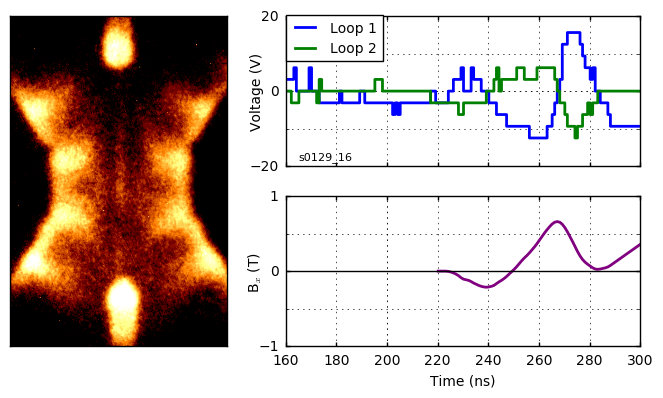

In [137]:
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib import rc, font_manager

rc('text', usetex=False)


m=1
fig=plt.figure(figsize=(6.69*m,4*m), dpi=600)

gs1 = gridspec.GridSpec(1, 1,)
gs1.update(left=0.0, right=0.4, wspace=0.05, top=0.95)

gs2 = gridspec.GridSpec(2, 1,)
gs2.update(left=0.45, right=0.98, top=0.95)

ax1 = plt.subplot(gs1[0])
ax5 = plt.subplot(gs2[0])
ax6 = plt.subplot(gs2[1])

#bdot traces

pair="T12"
ts=1530

a=ax5
#10* voltage accounts for attenuatore
a.step(b.bd[pair].bd1.time-ts, 10*b.bd[pair].bd1.data, lw=2*m, label="Loop 1")
a.step(b.bd[pair].bd1.time-ts, 10*b.bd[pair].bd2.data, lw=2*m, label="Loop 2")
    
a.set_ylim([-20,20])
a.set_yticks([-20,0,20])

a.set_ylabel(r'Voltage (V)', fontsize=10*m, labelpad=30)

a.yaxis.set_minor_locator(MultipleLocator(10))
a.legend(fontsize=10*m, loc=(0,0.7))

a=ax6

a.plot(b.bd[pair].time_B-ts, -b.bd[pair].B, lw=2*m, label="Magnetic Field", c='purple')
a.plot([0,1000], [0,0], lw=1*m, c='black')
    
a.set_ylim([-1,1])
a.set_yticks([-1,0,1])

a.set_ylabel(r'B$_x$ (T)', fontsize=10*m)
#a.set_title('Integrated Magnetic Field', fontsize=10)

a.yaxis.set_minor_locator(MultipleLocator(0.5))
a.xaxis.set_minor_locator(MultipleLocator(100))


a.set_xlabel('Time (ns)', fontsize=10*m)

for a in [ax5,ax6]:
    a.set_xlim([160,300])
    a.yaxis.set_label_coords(-0.06, 0.5)
    a.grid(which='major')
    a.grid(which='minor')
    a.set_axisbelow(True)
    a.tick_params(labelsize=10*m, pad=5*m, length=3*m, width=1*m)

ax5.text(s='s0129_16', ha='left', va='bottom',x=165, y=-19, fontsize=8*m)

plt.setp(ax5.get_xticklabels(), visible=False)


hot_im=[]
for i,im in enumerate(s.s_c):
    im=s.s_c[i]
    plasmoid_location=pl[i]
    clim=[0.2,0.8]
    if i is 3:
        clim=[0.0,0.6]
    ax1.imshow(im, cmap='afmhot', clim=clim)
    #plt.axis('off')
    t=ax1.text(s=str(s.frame_times[i])+' ns', ha='left', va='top',x=10, y=10, fontsize=10*m, color='w')
    if plasmoid_location is not None:
        arrow=ax1.annotate('', xy=(270, plasmoid_location), xytext=(370, plasmoid_location),
                    arrowprops=dict(facecolor='white', width=10*m, headwidth=20*m,headlength=10*m),
                    )
    else:
        arrow=None

    p1=ax6.add_patch(
        patches.Rectangle(
            (s.frame_times[i], -1),   # (x,y)
            5,          # width
            2,          # height
            alpha=0.5,
            color='orange'
        )
    )
    
    p2=ax5.add_patch(
        patches.Rectangle(
            (s.frame_times[i], -20),   # (x,y)
            5,          # width
            40,          # height
            alpha=0.5,
            color='orange'
        )
    )
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)

    fig.canvas.draw()
    w,h=fig.canvas.get_width_height()
    buf=np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8)
    buf.shape=(h,w,3)
    hot_im.append(buf)
    
    t.remove()
    p1.remove()
    p2.remove()

    if plasmoid_location is not None:
        arrow.remove()
        
ig.writeGif('s0129B16 bdots animated.gif',hot_im, duration=0.3)

In [38]:
th_folder=r'~\Google Drive\MAGPIE\conferences\plaspar2017'
fn='bdots.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

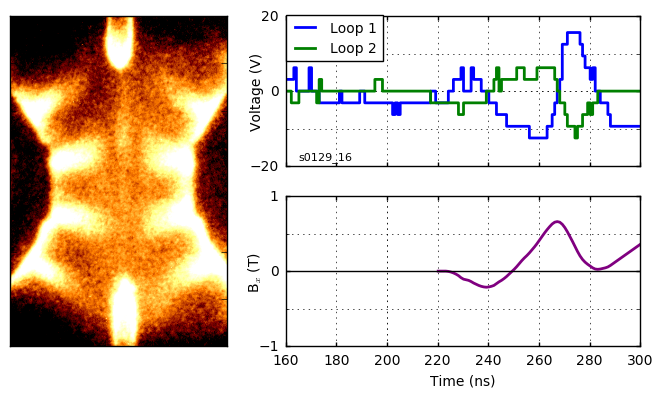

In [138]:
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib import rc, font_manager



m=1
fig=plt.figure(figsize=(6.69*m,4*m), dpi=600)

gs1 = gridspec.GridSpec(1, 1,)
gs1.update(left=0.0, right=0.4, wspace=0.05, top=0.95)

gs2 = gridspec.GridSpec(2, 1,)
gs2.update(left=0.45, right=0.98, top=0.95)

ax1 = plt.subplot(gs1[0])
ax5 = plt.subplot(gs2[0])
ax6 = plt.subplot(gs2[1])

#bdot traces

pair="T12"
ts=1530

a=ax5
#10* voltage accounts for attenuatore
a.step(b.bd[pair].bd1.time-ts, 10*b.bd[pair].bd1.data, lw=2*m, label="Loop 1")
a.step(b.bd[pair].bd1.time-ts, 10*b.bd[pair].bd2.data, lw=2*m, label="Loop 2")
    
a.set_ylim([-20,20])
a.set_yticks([-20,0,20])

a.set_ylabel(r'Voltage (V)', fontsize=10*m, labelpad=30)

a.yaxis.set_minor_locator(MultipleLocator(10))
a.legend(fontsize=10*m, loc=(0,0.7))

a=ax6

a.plot(b.bd[pair].time_B-ts, -b.bd[pair].B, lw=2*m, label="Magnetic Field", c='purple')
a.plot([0,1000], [0,0], lw=1*m, c='black')
    
a.set_ylim([-1,1])
a.set_yticks([-1,0,1])

a.set_ylabel(r'B$_x$ (T)', fontsize=10*m)
#a.set_title('Integrated Magnetic Field', fontsize=10)

a.yaxis.set_minor_locator(MultipleLocator(0.5))
a.xaxis.set_minor_locator(MultipleLocator(100))


a.set_xlabel('Time (ns)', fontsize=10*m)

for a in [ax5,ax6]:
    a.set_xlim([160,300])
    a.yaxis.set_label_coords(-0.06, 0.5)
    a.grid(which='major')
    a.grid(which='minor')
    a.set_axisbelow(True)
    a.tick_params(labelsize=10*m, pad=5*m, length=3*m, width=1*m)

ax5.text(s='s0129_16', ha='left', va='bottom',x=165, y=-19, fontsize=8*m)

plt.setp(ax5.get_xticklabels(), visible=False)


hot_im=[]
for i in [5]:
    im=s.s_c[i]
    plasmoid_location=pl[i]
    clim=[0.2,0.8]
    if i is 3:
        clim=[0.0,0.6]
    ax1.imshow(im, cmap='afmhot', clim=clim)
    #plt.axis('off')
    t=ax1.text(s=str(s.frame_times[i])+' ns', ha='left', va='top',x=10, y=10, fontsize=10*m, color='w')


    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)

    fig.canvas.draw()
    w,h=fig.canvas.get_width_height()
    buf=np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8)
    buf.shape=(h,w,3)
    hot_im.append(buf)
    
    t.remove()
        
ig.writeGif('s0129B16 bdots f5.gif',hot_im, duration=0.3)